### DBSCAN Clustering Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 250 , noise = 0.05)
X

array([[ 8.08793350e-01,  7.91670310e-01],
       [-8.55734476e-01,  4.87430619e-01],
       [ 1.86817479e+00,  1.37209542e-02],
       [ 1.44974071e+00, -3.88449484e-01],
       [ 2.21300870e-01,  9.78418834e-01],
       [ 9.98855787e-01, -4.43152995e-01],
       [ 3.04214523e-01,  9.57398719e-01],
       [ 1.13133450e-01,  1.88790817e-01],
       [ 1.99632977e-02,  4.63172223e-01],
       [ 9.32330562e-01, -4.78915535e-01],
       [ 7.81020494e-01,  6.81190855e-01],
       [ 7.85537271e-01,  7.45609810e-01],
       [ 8.01012866e-01,  5.14816726e-01],
       [ 6.58180677e-01, -4.07524753e-01],
       [ 1.98497961e+00,  4.15413077e-01],
       [ 7.56132735e-01,  6.82535851e-01],
       [-1.62684770e-01,  1.00329334e+00],
       [ 1.88272463e-01,  9.72616272e-01],
       [ 4.55723451e-02,  2.30294398e-01],
       [ 1.22897773e+00, -4.44145102e-01],
       [ 1.93703785e+00,  6.29187750e-02],
       [ 3.31401213e-01,  9.65049827e-01],
       [ 1.27630875e+00, -4.39310735e-01],
       [ 7.

In [3]:
y

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

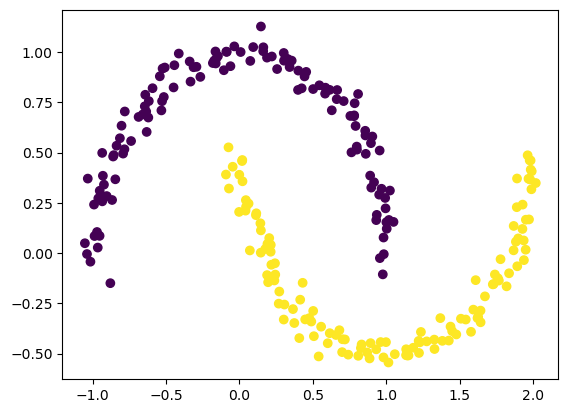

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [6]:
## feature Scaling (Standard Scaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled

array([[ 3.55937439e-01,  1.11766230e+00],
       [-1.57800920e+00,  4.97946844e-01],
       [ 1.58678930e+00, -4.66967364e-01],
       [ 1.10062790e+00, -1.28616106e+00],
       [-3.26645989e-01,  1.49805628e+00],
       [ 5.76763193e-01, -1.39758837e+00],
       [-2.30312014e-01,  1.45523974e+00],
       [-4.52321279e-01, -1.10362020e-01],
       [-5.60571859e-01,  4.48534148e-01],
       [ 4.99470261e-01, -1.47043422e+00],
       [ 3.23669296e-01,  8.92623199e-01],
       [ 3.28917155e-01,  1.02384021e+00],
       [ 3.46897614e-01,  5.53730471e-01],
       [ 1.80946749e-01, -1.32501608e+00],
       [ 1.72250003e+00,  3.51252033e-01],
       [ 2.94753229e-01,  8.95362865e-01],
       [-7.72783161e-01,  1.54872394e+00],
       [-3.65020340e-01,  1.48623685e+00],
       [-5.30817757e-01, -2.58220629e-02],
       [ 8.44132440e-01, -1.39960922e+00],
       [ 1.66679847e+00, -3.66754766e-01],
       [-1.98724914e-01,  1.47082452e+00],
       [ 8.99124415e-01, -1.38976195e+00],
       [ 3.

### DBSCAN Implementation

In [11]:
from sklearn.cluster import DBSCAN
 dbscan= DBSCAN(eps= 0.3)

In [12]:
dbscan

DBSCAN(eps=0.3)

In [14]:
dbscan.fit(X_scaled)

DBSCAN(eps=0.3)

In [15]:
dbscan.labels_

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

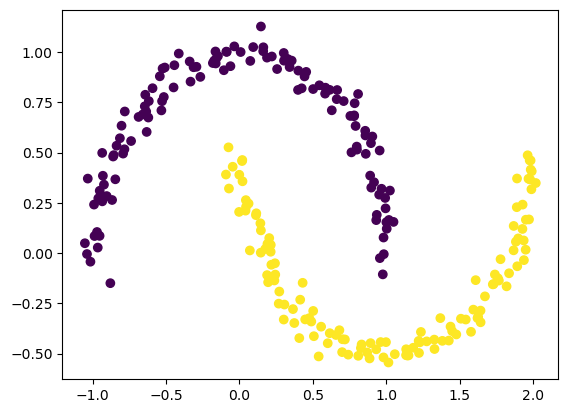

In [16]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

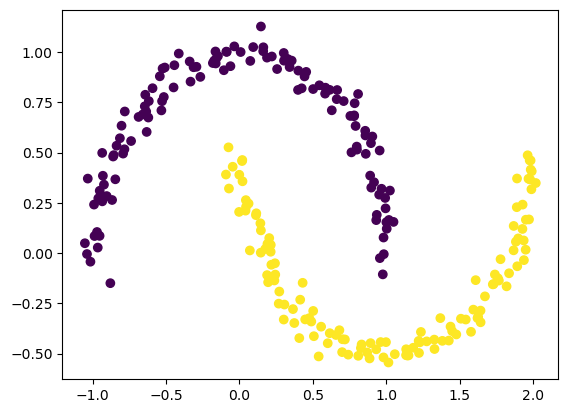

In [17]:
plt.scatter(X[:,0],X[:,1],c=y)